### Continous random variables

- Check: https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb


### Probability Density Function

- A probability density function (PDF), or density of a continuous random variable, is a function $f_X$ that describes the relative probability of the random variable $X$ taking a given value. A random variable $X$ has density $f(x)$ if

1. $f (x) \geq 0$, for all $x \in \mathbb{R}$.
2. $\int_{-\infty}^{\infty} f(x) dx = 1$.
3. $P(a \leq X \leq b)=\int_{a}^{b} f(x) dx$.

- The Cumulative Distribution Function (CDF), denoted as $F(x)$, of a continuous random variable $X$ with PDF $f(x)$ is:
$$
F(x)=P(X \leq x) = \int_{-\infty}^{x} f(t) dt,\ 
-\infty < x < \infty 
$$
  - The CDF is the accumulated area under the PDF to the left of a given value $x$.


1. **Expected Value ($E[X]$)**:

   The expected value of a continuous random variable $X$ with probability density function (PDF) $f(x)$ is calculated as the definite integral of $x$ multiplied by the PDF:

   $$E[X] = \int_{-\infty}^{\infty} x \cdot f(x) \,dx $$

2. **Variance ($Var[X]$)**:

   Variance, which measures the spread of a random variable, is calculated as the definite integral of the squared difference between \(x\) and the expected value, weighted by the PDF:

$$Var[X] = \int_{-\infty}^{\infty} (x - E[X])^2 \cdot f(x) \,dx$$

   The standard deviation ($\sigma$) is the positive square root of the variance: $\sigma = \sqrt{Var[X]}$.

These expressions describe the expected value and variance of a continuous random variable.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Probability density function

$X$ is a continuous random variable with:

$$PDF(X) = f(x) = \frac{x^2}{3}, -1 < x < 2$$

- Check if it is a valid PDF:

$$\int_{-\infty}^{\infty} f(x) dx = 1$$

$$\int_{-1}^{2} \frac{x^2}{3} dx = \frac{x^3}{9} |_{-1}^{2} = \frac{2^3}{9} - \frac{(-1)^3}{9} =  1$$

- Calculate the following probability $P(0 \leq X\leq 1)$: 

$$P(0 \leq X\leq 1) = \int_{0}^{1} \frac{x^2}{3} dx = 1/9$$

(0.1111111111111111, 0.11111116677794466)

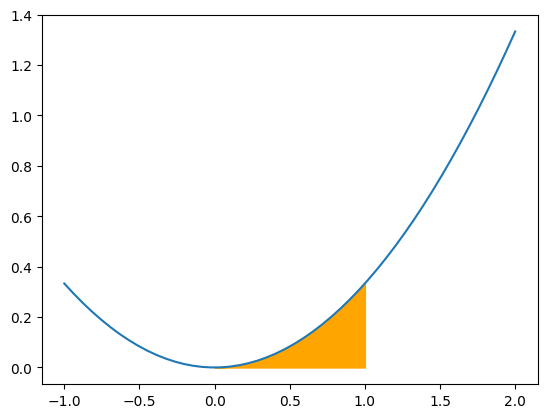

In [ ]:
f = lambda x:  x**2 / 3
x = np.linspace(-1, 2)
plt.plot(x, f(x))
x_prob = np.linspace(0, 1, 1000)
plt.fill_between(x_prob, f(x_prob), color="orange")
1/9, np.trapz(f(x_prob), x_prob)

$$P(X=x) = 0$$

$$P(X=0.5) = 0$$

0.0

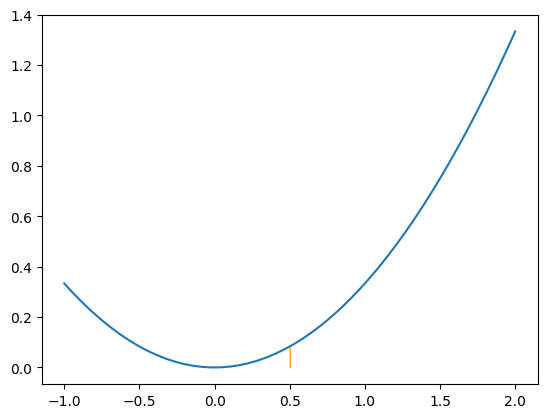

In [ ]:
# Try values around --> 0.5 <--
plt.plot(x, f(x))
x_prob = np.linspace(0.5, 0.5, 1000)
plt.fill_between(x_prob, f(x_prob), color="orange")
np.trapz(f(x_prob), x_prob)

### Commulative distribution function

$$CDF:\ F(X) = P(X\leq x) = \int_{-\infty}^{x} f(t) dt$$

$$F(X) = \int_{-1}^{x} t^2 / 3 dt = t^3/9 |_{-1}^{x} = x^3/9 + 1/9$$

$$P(0 \leq X\leq 1) = \int_{0}^{1} \frac{x^2}{3} dx = 1/9$$

$$P(0 \leq X\leq 1) = F(1) - F(0) = (1^3/9 + 1/9) - 1/9 = 1/9$$

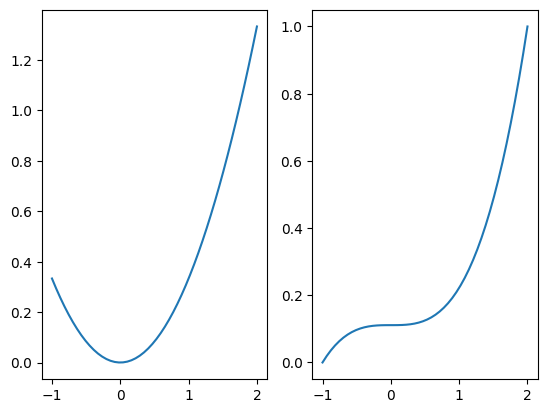

In [ ]:
# What is the behavior of the CDF
F = lambda x: x**3/9 + 1/9  # CDF
plt.subplot(1,2,1)
plt.plot(x, f(x))  # PDF
plt.subplot(1,2,2)
plt.plot(x, F(x))  # CDF

### Expected value and variance of a continous random variable 

$$ E[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx $$

$$ E[X] = \int_{-1}^{2} x * x^2/3 dx = x^4/12 |_{-1}^{2} = 2^4/12 - (-1)^4/12 = 15/12$$

$$ E[X^2] = \int_{-1}^{2} x^2 * x^2/3 dx = x^5/15 |_{-1}^{2} = 2^5/15 - (-1)^5/15 = 32/15 + 1/15 = 33/15$$

$$Var[X] =  E[X^2] -  (E[X])^2 = 33/15 - (15/12)^2$$

In [ ]:
15/12, 33/15 - (15/12)**2

(1.25, 0.6375000000000002)

### Inverse of the CDF (Quantile function)

$$F^{-1}(u) \rightarrow (9u-1)^{1/3}$$

### Inverse transform sampling method

$$u = (x^3+1)/9 \rightarrow (9u-1)^{1/3} = x$$

- Check: https://en.wikipedia.org/wiki/Quantile_function

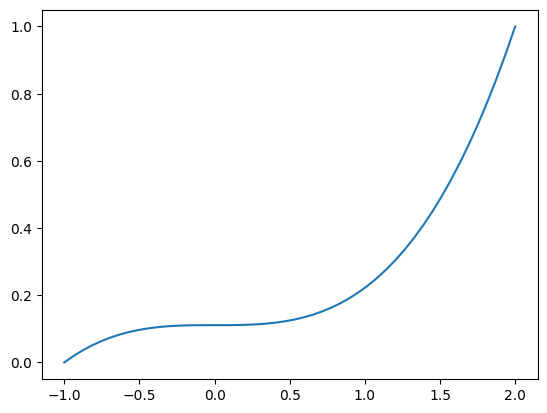

In [ ]:
plt.plot(x, F(x))  # CDF

<img src="image-20231117-182255.png" width="" align="" />

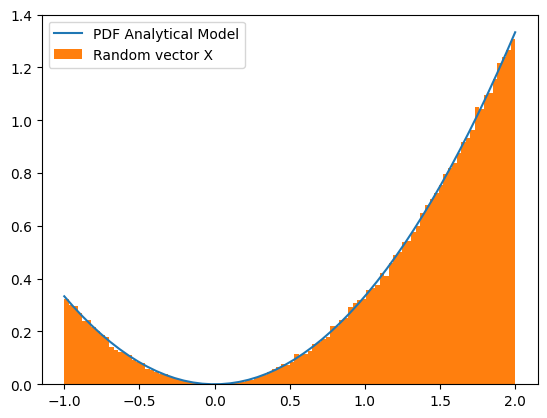

In [ ]:
# Implement ITS, calculate mean and variance

I = lambda u: np.cbrt(9*u - 1)  # Quantile function F^-1(p)

# Generate vector U \sim Uniform(0, 1)
U = np.random.random(size=100000)
X = I(U)
# This is our PDF: Analytical Model
plt.plot(x, f(x), label='PDF Analytical Model')
# This is the generated random vector X (a histogram)
plt.hist(X, density=True, bins=100, label="Random vector X");
plt.legend();

In [ ]:
I(U)

array([1.70050841, 1.93899731, 1.82422513, 1.7804146 , 1.89343931,
       1.49216336, 1.22436201, 1.70790679, 1.67144678, 1.92052577])

### Rejection method (review hit and miss Monte Carlo)

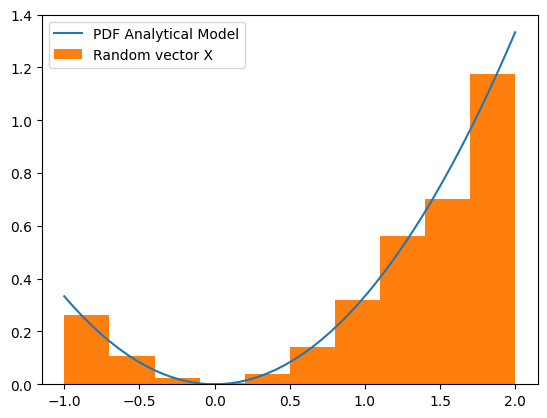

In [ ]:
# Implement rejection method

# Define board
a, b = -1, 2  # X limits
c = 2  # the function must be <= c

size_X = 1000
X = []

while True:
    xr = np.random.random()*(b-a) + a
    yr = np.random.random()*c
    if yr < f(xr):
        X += [xr]
    if len(X) == size_X: break

plt.plot(x, f(x), label='PDF Analytical Model')
plt.hist(X, density=True, label="Random vector X");
plt.legend();

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>